In [1]:
import networkx as nx

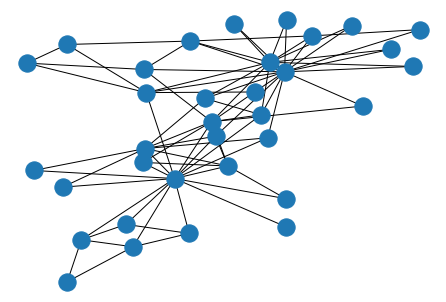

In [2]:
# Create a graph and visualize it
G = nx.karate_club_graph()

import matplotlib.pyplot as plt
nx.draw(G)

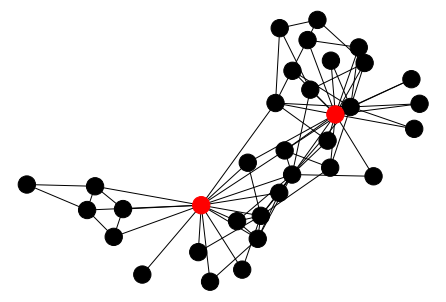

In [3]:
s = 0                          # adminstrator
t = G.number_of_nodes() - 1    # instructor

node_colors = [ "red" if i in {s,t} else "black" for i in G.nodes]
nx.draw(G,node_color=node_colors)

In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
# DG is directed version of G. Replaces each edge {i,j} by (i,j) and (j,i)
DG = nx.DiGraph(G)

# Suppose unit arc capacities
c = { (i,j) : 1 for (i,j) in DG.edges }

In [6]:
# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars( DG.edges )

# Objective function: maximize net flow out of node s
m.setObjective( gp.quicksum( x[s,j] - x[j,s] for j in DG.neighbors(s) ), GRB.MAXIMIZE )

# Add flow-balance constraints at all nodes (besides s and t)
m.addConstrs( gp.quicksum( x[j,i] - x[i,j] for j in DG.neighbors(i) ) == 0 for i in G.nodes if i not in {s,t} )

# Add capacity constraints
m.addConstrs( x[i,j] <= c[i,j] for i,j in DG.edges )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 188 rows, 156 columns and 402 nonzeros
Model fingerprint: 0xd2025335
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 174 rows and 118 columns
Presolve time: 0.03s
Presolved: 14 rows, 38 columns, 57 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6000000e+01   1.800000e+01   0.000000e+00      0s
      14    1.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 14 iterations and 0.06 seconds
Optimal objective  1.000000000e+01


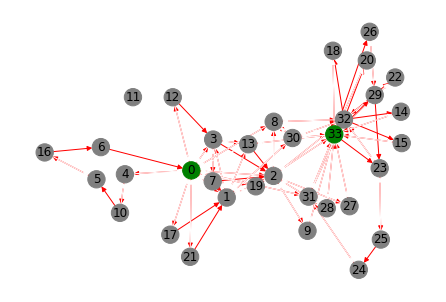

In [7]:
# Visualize the solution
flow_edges = [ (i,j) for i,j in DG.edges if x[i,j].x > 0.01 ]

edge_colors = [ "red" if i in flow_edges else "white" for i in DG.edges ]
node_colors = [ "green" if i in {s,t} else "gray" for i in DG.nodes ]

nx.draw( DG, with_labels=True, edge_color=edge_colors, node_color=node_colors )

In [8]:
# Find a sparsest (max-flow-optimal) solution 
max_flow = int( m.objVal )

m.addConstr( gp.quicksum( x[s,j] - x[j,s] for j in DG.neighbors(s) ) == max_flow )

m.setObjective( gp.quicksum( x[i,j] for i,j in DG.edges ), GRB.MINIMIZE )

m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 189 rows, 156 columns and 434 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1400000e+32   1.770000e+32   1.140000e+02      0s
      86    3.5000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 86 iterations and 0.02 seconds
Optimal objective  3.500000000e+01


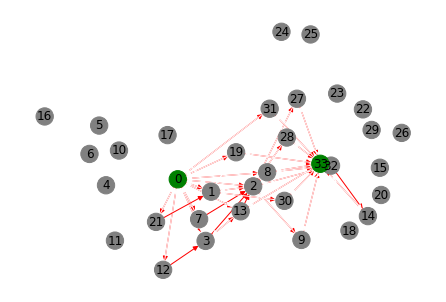

In [9]:
# Visualize the solution
flow_edges = [ (i,j) for i,j in DG.edges if x[i,j].x > 0.5 ]

edge_colors = [ "red" if i in flow_edges else "white" for i in DG.edges ]
node_colors = [ "green" if i in {s,t} else "gray" for i in DG.nodes ]

nx.draw( DG, with_labels=True, edge_color=edge_colors, node_color=node_colors )